# Predict Apartment Rent In Germany With CatBoost

# Description
**Data Analysis of Rent in Germany and Machine Learning Rent Prediction Model**

This project focuses on analyzing rental market trends in Germany and building a machine learning model to predict future rent prices. The analysis examines key factors influencing rent variations across different states, and property features such as location, size, and condition...
Exploratory Data Analysis (EDA) is conducted to uncover patterns, correlations, and anomalies in the dataset, which forms the foundation for feature engineering. For the predictive modelling, different machine learning algorithms are tested and evaluated to determine the most accurate approach for predicting rent prices. The model is fine-tuned using performance metrics such as Mean Absolute Error (MAE) to ensure it provides reliable rent estimates. The goal is to offer a tool that can help renters, property investors, and real estate professionals better understand the rental landscape and forecast future rental costs with greater precision.

**Data Visualization in Tableau**
https://public.tableau.com/app/profile/duc.ninh.vo/viz/rent_germany/rent_in_germany

# Plan

## Import 

In [974]:
# import package
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

from catboost import CatBoostRegressor, Pool, cv
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import  train_test_split

import os

In [975]:
# load data
pd.set_option('display.max_columns', None)
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [976]:
# Get the current working directory
current_directory = os.getcwd()

# Define the CSS file name
data_file_name = 'immo_data.csv'  

# Create the full file path
data_file_path = os.path.join(current_directory, data_file_name)
offers = pd.read_csv(data_file_path)
offers.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


## Initial EDA and data cleaning

In [977]:
# check duplication
offers[offers.duplicated(keep=False)].sort_values(by='description')

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date


In [978]:
# drop duplicate
offers.drop_duplicates(inplace=True)

In [979]:
offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [980]:
offers.describe(include='all')

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
count,268850,261941.000000,223994,236231,45020.0,268850,268850,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211886,268850,268850,268850,211805.000000,2.688500e+05,197832,268850.000000,268850,200361,156185,154277,268850,197837,268850,268850.000000,232236,268850.000000,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850,268850.000000,268850,268850,249103,215926,85518.000000,77787,80711.000000,46846.000000,46846.000000,268850
unique,16,NaN,13,3,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132,2,16,2,NaN,NaN,5510,NaN,419,10,4,3,52373,54490,2,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,419,8684,212621,189526,NaN,10,NaN,NaN,NaN,4
top,Nordrhein_Westfalen,NaN,central_heating,ONE_YEAR_FREE,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gas,False,Nordrhein_Westfalen,True,NaN,NaN,1,NaN,Leipzig,well_kept,normal,negotiable,no_information,Hauptstraße,False,NaN,apartment,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,Leipzig,Innenstadt,+ MEIN GUENTZ - Quartier der Generationen\r\n+...,Laminat,NaN,C,NaN,NaN,NaN,Feb20
freq,62863,NaN,128977,227632,NaN,247679,165734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110899,176794,62863,172235,NaN,NaN,7173,NaN,13723,66591,81826,91970,71013,911,205528,NaN,131522,NaN,NaN,NaN,NaN,NaN,NaN,216093,NaN,13723,4751,216,207,NaN,14613,NaN,NaN,NaN,79276
mean,NaN,151.206113,NaN,NaN,10.0,NaN,NaN,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,NaN,NaN,NaN,NaN,3.714544,6.941294e+02,NaN,74.355548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.765256,NaN,37283.022235,2.641261,114.749533,2.122405,3.572319,2.571542,NaN,3.070790,NaN,NaN,NaN,NaN,76.990866,NaN,2013.904536,89.113612,0.199769,NaN
std,NaN,308.295790,NaN,NaN,0.0,NaN,NaN,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,NaN,NaN,NaN,NaN,2.738134,1.953602e+04,NaN,254.759208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.214357,NaN,27798.037296,2.633440,61.653663,3.634934,6.375496,0.937594,NaN,1.407127,NaN,NaN,NaN,NaN,147.716278,NaN,10.963125,5.395805,0.009667,NaN
min,NaN,0.000000,NaN,NaN,10.0,NaN,NaN,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,NaN,NaN,NaN,NaN,1.000000,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,852.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,1015.000000,71.430000,0.170500,NaN
25%,NaN,95.000000,NaN,NaN,10.0,NaN,NaN,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,NaN,NaN,NaN,NaN,1.000000,3.380000e+02,NaN,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,9128.000000,2.000000,79.000000,1.000000,2.000000,2.000000,NaN,2.000000,NaN,NaN,NaN,NaN,54.000000,NaN,2012.000000,90.760000,0.191500,NaN
50%,NaN,135.000000,NaN,NaN,10.0,NaN,NaN,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,NaN,NaN,NaN,NaN,3.000000,4.900000e+02,NaN,67.320000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,38667.000000,3.000000,107.000000,2.000000,3.000000,3.000000,NaN,3.000000,NaN,NaN,NaN,NaN,70.000000,NaN,2017.000000,90.760000,0.198500,NaN
75%,NaN,190.000000,NaN,NaN,10.0,NaN,NaN,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,NaN,NaN,NaN,NaN,5.000000,7.990000e+02,NaN,87.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,57072.000000,3.000000,140.300000,3.000000,4.000000,3.000000,NaN,4.000000,NaN,NaN,NaN,NaN,90.000000,NaN,2019.000000,90.760000,0.205500,NaN


In [981]:
offers.shape

(268850, 49)

In [982]:
offers.size

13173650

In [983]:
# Function to check missing values
def check_na(data):
    na_counts = data.isna().sum()
    na_percentage = (na_counts / len(data)) * 100
    df_na_counts = pd.DataFrame({'Missing Values':na_counts.values,'Percentage Missing':na_percentage.values,'Data Type':data.dtypes}).sort_values(by='Percentage Missing',ascending=False).reset_index(names='Column')
    return df_na_counts

In [984]:
df_na_counts = check_na(offers)
df_na_counts

,Column,Missing Values,Percentage Missing,Data Type
0,telekomHybridUploadSpeed,223830,83.254603,float64
1,electricityKwhPrice,222004,82.575414,float64
2,electricityBasePrice,222004,82.575414,float64
3,energyEfficiencyClass,191063,71.066766,object
4,lastRefurbish,188139,69.979171,float64
5,heatingCosts,183332,68.191185,float64
6,noParkSpaces,175798,65.388879,float64
7,petsAllowed,114573,42.615957,object
8,interiorQual,112665,41.906267,object
9,thermalChar,106506,39.615399,float64


In [985]:
# drop all columns with more than 26% missing data
subset_offers = offers.drop(df_na_counts[df_na_counts['Percentage Missing'] > 26]['Column'],axis=1)

In [986]:
# drop unnecessary columns
# geo_bln is the same as regio1
# geo_krs is the same as regio2
subset_offers = subset_offers.drop(['geo_bln','geo_krs','scoutId','street','picturecount','noRoomsRange','yearConstructedRange','baseRentRange','livingSpaceRange'],axis=1)

In [987]:
# drop rows with missing value in 'pricetrend'
subset_offers.dropna(subset=['pricetrend'],inplace=True)

In [988]:
check_na(subset_offers)

,Column,Missing Values,Percentage Missing,Data Type
0,condition,68180,25.533859,object
1,yearConstructed,56725,21.243886,float64
2,firingTypes,56674,21.224786,object
3,facilities,52663,19.722640,object
4,floor,50980,19.092346,float64
5,heatingType,44686,16.735201,object
6,totalRent,40294,15.090368,float64
7,typeOfFlat,36439,13.646646,object
8,telekomUploadSpeed,32257,12.080459,float64
9,telekomTvOffer,31527,11.807069,object


In [989]:
# convert postcode to string
subset_offers['geo_plz'] = subset_offers['geo_plz'].astype(str)

In [990]:
subset_offers.describe()

,serviceCharge,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,baseRent,livingSpace,noRooms,floor
count,260150.000000,267018.000000,234761.000000,2.267240e+05,210293.000000,2.670180e+05,267018.000000,267018.000000,216038.000000
mean,150.965451,3.389001,28.814371,8.999485e+02,1966.255396,6.927776e+02,74.292632,2.640154,2.119905
std,309.214375,1.964874,16.332615,3.335601e+04,46.999394,1.960285e+04,255.615776,2.641114,3.367877
min,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,0.000000e+00,0.000000,1.000000,-1.000000
25%,95.000000,2.000000,10.000000,4.690000e+02,1950.000000,3.372025e+02,54.000000,2.000000,1.000000
50%,135.000000,3.390000,40.000000,6.490000e+02,1972.000000,4.900000e+02,67.200000,3.000000,2.000000
75%,190.000000,4.570000,40.000000,9.800000e+02,1996.000000,7.950000e+02,86.700000,3.000000,3.000000
max,146118.000000,14.920000,100.000000,1.575154e+07,2090.000000,9.999999e+06,111111.000000,999.990000,999.000000


### Check 'livingSpace'

Assume that a room for rent muss be bigger than 5qm and if the living space is smaller or equall 5 then users might input wrong. Inspect the offers with less than or equal 5qm living space and greater than or equal 450

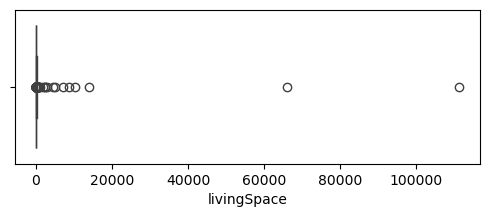

In [991]:
# Create boxplots for 'livingSpace'
plt.figure(figsize=(6,2))
sns.boxplot(x = subset_offers['livingSpace'])
plt.show()

In [992]:
extreme_small = subset_offers[(subset_offers['livingSpace'] <= 5.0)][['livingSpace','totalRent','baseRent','serviceCharge']].sort_values(by=['livingSpace','totalRent','baseRent','serviceCharge'])
extreme_small

,livingSpace,totalRent,baseRent,serviceCharge
35630,0.0,0.0,0.0,0.0
69577,0.0,0.0,0.0,1.5
93073,0.0,0.0,0.0,NaN
232236,0.0,0.0,10.0,80.0
243369,0.0,0.0,60.0,0.0
...,...,...,...,...
211909,2.0,NaN,400.0,100.0
19381,3.0,50.0,50.0,NaN
109242,3.0,380.0,225.0,155.0
5206,3.0,1970.8,1584.8,228.0


In [993]:
extreme_big  = subset_offers[(subset_offers['livingSpace'] >= 450.0)][['livingSpace','totalRent','baseRent','serviceCharge']].sort_values(by=['livingSpace','totalRent','baseRent','serviceCharge'],ascending = [False,True,True,True])
extreme_big 

,livingSpace,totalRent,baseRent,serviceCharge
175397,111111.00,369.00,679.00,NaN
151184,66100.00,1400.00,1200.00,115.00
243713,14000.00,NaN,120000.00,25000.00
223187,10259.00,1641.50,1385.00,128.25
51540,8684.00,650.00,504.00,146.00
202205,7008.00,NaN,519.00,107.00
229248,4947.00,NaN,200.00,140.00
172399,4340.00,260.00,200.00,60.00
215900,2782.00,NaN,245.00,60.00
222457,2420.00,NaN,283.14,99.35


Alot of these values dont make sense. It look like they were input wrong and there are not so many rows so I will drop all rows where livingSpace <= 5 & >= 600

In [994]:
subset_offers.drop(extreme_small.index,inplace=True)
subset_offers.drop(extreme_big.index,inplace=True)

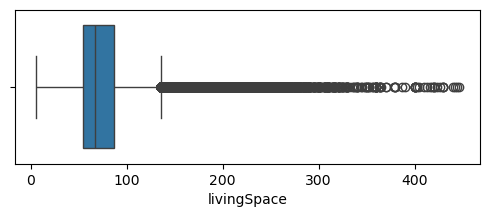

In [995]:
plt.figure(figsize=(6,2))
sns.boxplot(x = subset_offers['livingSpace'])
plt.show()

### Cross check 'baseRent', 'totalRent', 'serviceCharge'

The data must be available first, either in totalRent or baseRent or both. Missing value in serviceCharge can be filled later

In [996]:
# the data must be available first, either in totalRent or baseRent or both
# inspect rows which doesnt have data in both totalRent and baseRent
(subset_offers[((subset_offers['totalRent'].isna() | (subset_offers['totalRent'] == 0)) 
                & (subset_offers['baseRent'].isna() | (subset_offers['baseRent'] == 0)))]
 [['baseRent','totalRent','serviceCharge','livingSpace']])

,baseRent,totalRent,serviceCharge,livingSpace
201,0.0,NaN,90.00,45.34
11130,0.0,NaN,NaN,20.00
23721,0.0,NaN,NaN,30.00
28965,0.0,NaN,300.00,63.00
69778,0.0,NaN,NaN,175.00
79919,0.0,0.0,0.00,95.10
81618,0.0,NaN,120.00,12.00
104064,0.0,NaN,NaN,61.00
121653,0.0,0.0,0.00,62.00
140381,0.0,NaN,NaN,86.00


Remove those row so that there are just row with either totalRent or baseRent or both in the dataframe

In [997]:
subset_offers = subset_offers[~((subset_offers['totalRent'].isna() 
                                 | (subset_offers['totalRent'] == 0)) 
                                & (subset_offers['baseRent'].isna() 
                                   | (subset_offers['baseRent'] == 0)))]

#### Inspect serviceCharge

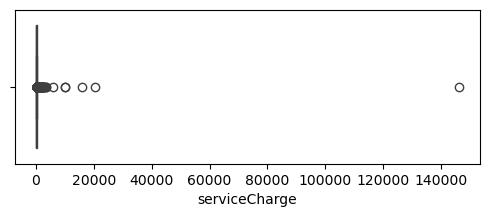

In [998]:
plt.figure(figsize=(6,2))
sns.boxplot(x = subset_offers['serviceCharge'])
plt.show()

In [999]:
# handle those outliers
percentile25 = subset_offers['serviceCharge'].quantile(0.25)
percentile75 = subset_offers['serviceCharge'].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

subset_offers.loc[subset_offers['serviceCharge'] > upper_limit, 'serviceCharge'] = upper_limit

In [1000]:
# inspect NA in serviceCharge
(subset_offers[subset_offers['serviceCharge'].isna()]
 [['serviceCharge','totalRent','baseRent','livingSpace']]
 .sort_values(by=['serviceCharge','totalRent','baseRent','livingSpace']))

,serviceCharge,totalRent,baseRent,livingSpace
131478,NaN,0.0,375.0,55.00
69061,NaN,0.0,500.0,100.00
204445,NaN,0.0,630.0,78.00
13934,NaN,0.0,630.0,93.00
79318,NaN,0.0,650.0,125.00
...,...,...,...,...
78989,NaN,NaN,6000.0,232.00
232138,NaN,NaN,6000.0,310.00
205851,NaN,NaN,6500.0,250.00
226970,NaN,NaN,8475.0,339.00


In [1001]:
# Fill missing values in 'serviceCharge' with its mean
subset_offers.fillna({'serviceCharge': subset_offers['serviceCharge'].mean()}, inplace=True)

#### Inspect baseRent

In [1002]:
subset_offers.describe()

,serviceCharge,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,baseRent,livingSpace,noRooms,floor
count,266856.000000,266856.000000,234628.000000,2.266210e+05,210205.000000,2.668560e+05,266856.000000,266856.000000,215949.000000
mean,146.606876,3.388699,28.817574,8.992170e+02,1966.254590,6.543590e+02,73.396568,2.638388,2.120024
std,71.601082,1.964826,16.331278,3.336341e+04,46.996668,3.123887e+03,31.782786,2.621643,3.368245
min,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,0.000000e+00,5.500000,1.000000,-1.000000
25%,96.000000,2.000000,10.000000,4.690000e+02,1950.000000,3.374875e+02,54.000000,2.000000,1.000000
50%,139.395000,3.390000,40.000000,6.489500e+02,1972.000000,4.900000e+02,67.200000,3.000000,2.000000
75%,185.000000,4.570000,40.000000,9.800000e+02,1996.000000,7.950000e+02,86.700000,3.000000,3.000000
max,332.262500,14.920000,100.000000,1.575154e+07,2090.000000,1.234567e+06,446.000000,999.990000,999.000000


In [1003]:
# inspect rows where baseRent = 0
(subset_offers[subset_offers['baseRent'] == 0]
 [['baseRent','livingSpace','totalRent','serviceCharge']]
 .sort_values(by=['baseRent','livingSpace']))

,baseRent,livingSpace,totalRent,serviceCharge
60312,0.0,10.00,220.0,146.606876
246738,0.0,17.00,290.0,0.000000
34210,0.0,18.00,320.0,146.606876
19619,0.0,20.00,470.0,146.606876
19386,0.0,22.00,549.0,146.606876
101310,0.0,24.00,330.0,146.606876
224299,0.0,28.00,325.0,146.606876
1377,0.0,30.00,700.0,146.606876
179948,0.0,30.00,450.0,100.000000
264041,0.0,30.00,450.0,146.606876


In [1004]:
# replace baseRent = 0 with totalRent - serviceCharge
subset_offers.loc[subset_offers['baseRent']==0,'baseRent'] = subset_offers['totalRent'] - subset_offers['serviceCharge']

In [1005]:
# inspect rows where baseRent <= 0 
zero_base = (subset_offers[subset_offers['baseRent'] <= 0]
             [['baseRent','livingSpace','totalRent','serviceCharge']]
             .sort_values(by=['baseRent','livingSpace']))
zero_base

,baseRent,livingSpace,totalRent,serviceCharge
65775,-67.606876,110.00,79.0,146.606876
21992,0.000000,71.26,180.0,180.000000
44138,0.000000,74.68,180.0,180.000000
214616,0.000000,75.00,180.0,180.000000


In [1006]:
# remove them
subset_offers.drop(zero_base.index,inplace=True)

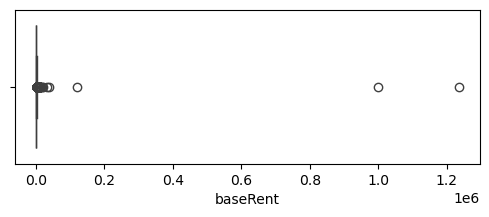

In [1007]:
# check outliers
plt.figure(figsize=(6,2))
sns.boxplot(x = subset_offers['baseRent'])
plt.show()

In [1008]:
# inspect the extreme high values in baseRent
extreme_high = (subset_offers[(subset_offers['baseRent'] >= 6000.0)]
                [['baseRent','livingSpace','totalRent','serviceCharge']]
                .sort_values(by=['baseRent','livingSpace'],ascending = [False,True])
                .head(20))
extreme_high

,baseRent,livingSpace,totalRent,serviceCharge
8406,1234567.00,76.00,1234567.00,146.606876
260259,1000000.00,10.00,1000000.00,146.606876
16731,120000.00,65.72,NaN,146.606876
181618,39200.00,49.00,NaN,165.000000
176647,30990.00,47.67,449.90,78.000000
213625,20100.00,110.00,2390.00,140.000000
250558,17781.12,362.88,20466.12,332.262500
57237,13000.00,269.00,15000.00,332.262500
196419,12000.00,300.00,13000.00,332.262500
61094,12000.00,364.00,15500.00,332.262500


In [1009]:
# drop the problematic rows
subset_offers.drop(extreme_high[:7].index,inplace=True)

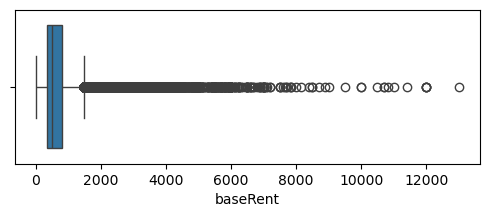

In [1010]:
# look at the boxplot again
plt.figure(figsize=(6,2))
sns.boxplot(x = subset_offers['baseRent'])
plt.show()

Use the logic that totalRent >= baseRent + serviceCharge to validate data in those columns

In [1011]:
# inspect rows where serviceCharge >= totalRent
subset_offers[(subset_offers['serviceCharge'] >= subset_offers['baseRent'])][['baseRent','totalRent','serviceCharge','livingSpace']].sort_values(by='totalRent')

,baseRent,totalRent,serviceCharge,livingSpace
236196,1.0,1.0,146.606876,47.51
73029,315.0,2.0,332.262500,45.02
123768,9.0,9.0,146.606876,80.00
130782,10.0,10.0,146.606876,120.00
163703,10.0,10.0,146.606876,360.00
...,...,...,...,...
224810,30.0,NaN,146.606876,10.00
236543,1.0,NaN,146.606876,55.00
257443,65.0,NaN,146.606876,70.00
262089,1.0,NaN,146.606876,187.70


The reason for this can be wrong input or confusing between 3 column. I will better remove them

In [1012]:
# remove rows where serviceCharge >= totalRent
subset_offers = subset_offers[~(subset_offers['serviceCharge'] >= subset_offers['totalRent'])]

In [1013]:
# inspect rows where baseRent > totalRent
subset_offers[(subset_offers['baseRent'] > subset_offers['totalRent'])][['baseRent','totalRent','serviceCharge','livingSpace']].sort_values(by='totalRent')

,baseRent,totalRent,serviceCharge,livingSpace
72313,65.00,60.00,5.0000,20.00
143501,620.00,85.00,50.0000,38.00
261708,99.00,97.00,15.0000,20.00
209703,750.28,99.76,96.1900,96.19
245057,249.00,128.00,116.0000,58.00
...,...,...,...,...
217219,2250.00,2100.00,0.0000,87.00
42566,2400.00,2200.00,0.0000,87.00
35641,2400.00,2200.00,0.0000,87.00
104059,3620.00,2903.00,283.0000,141.68


There can be a few reason for it for example the data in totalRent is missing (totalRent = 0) or confusing input between baseRent and totalRent... To avoid misinterpretation by trying to transform them somehow usable, i will just remove them

In [1014]:
subset_offers = subset_offers[~(subset_offers['baseRent'] > subset_offers['totalRent'])]

#### Handle missing value and validate totalRent

In [1015]:
# create calTotalRent
subset_offers['calTotalRent'] = subset_offers['baseRent'] + subset_offers['serviceCharge']

In [1016]:
# fill na in totalRent with baseRent + serviceCharge
subset_offers.loc[subset_offers['totalRent'].isna(),'totalRent'] = subset_offers['baseRent'] + subset_offers['serviceCharge'] 

calTotalRent is expected to be smaller than or equal to totalRent

In [1017]:
subset_offers['totalRentDiff'] = (subset_offers['totalRent'] -  subset_offers['calTotalRent'])

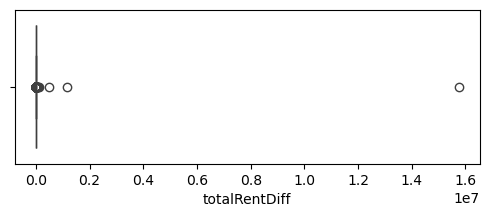

In [1018]:
plt.figure(figsize=(6,2))
sns.boxplot(x = subset_offers['totalRentDiff'])
plt.show()

In [1019]:
# handle those outliers
percentile25 = subset_offers['totalRentDiff'].quantile(0.25)
percentile75 = subset_offers['totalRentDiff'].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

subset_offers.loc[subset_offers['totalRentDiff'] > upper_limit, 'totalRentDiff'] = upper_limit

subset_offers.loc[subset_offers['totalRentDiff'] < 0, 'totalRentDiff'] = 0

In [1020]:
# re-calculate totalRent
subset_offers['totalRent'] = subset_offers['totalRentDiff'] + subset_offers['calTotalRent']

# drop calTotalRent and totalRentDiff
subset_offers.drop(['calTotalRent','totalRentDiff'],axis=1,inplace = True)

#### Check outliers in totalRent

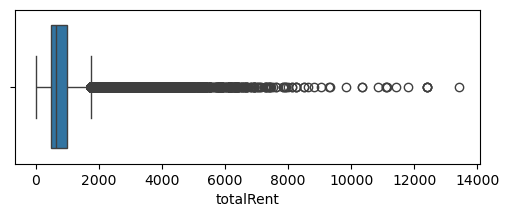

In [1021]:
plt.figure(figsize=(6,2))
sns.boxplot(x = subset_offers['totalRent'])
plt.show()

In [1022]:
extreme_high = (subset_offers[(subset_offers['totalRent'] >= 6000.0)]
                [['baseRent','livingSpace','totalRent','serviceCharge']]
                .sort_values(by=['totalRent','livingSpace'],ascending = [False,True])
                .head(20))
extreme_high

,baseRent,livingSpace,totalRent,serviceCharge
57237,13000.0,269.00,13407.262500,332.262500
196419,12000.0,300.00,12407.262500,332.262500
61094,12000.0,364.00,12407.262500,332.262500
241809,12000.0,364.63,12407.262500,332.262500
118653,12000.0,420.00,12407.262500,332.262500
96351,11400.0,427.00,11807.262500,332.262500
223703,11000.0,403.00,11407.262500,332.262500
71110,10816.0,416.00,11148.262500,332.262500
112744,10700.0,236.60,11107.262500,332.262500
71162,10700.0,277.00,11107.262500,332.262500


### Inspect categorical feature and other numerical feature

#### Check outliers in floor

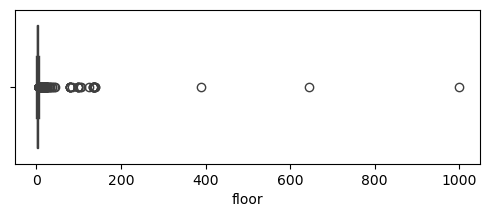

In [1023]:
plt.figure(figsize=(6,2))
sns.boxplot(x = subset_offers['floor'])
plt.show()

In [1024]:
# handle outliers
percentile25 = subset_offers['floor'].quantile(0.25)
percentile75 = subset_offers['floor'].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = round(percentile75 + 1.5 * iqr,0)

subset_offers.loc[subset_offers['floor'] > upper_limit, 'floor'] = upper_limit

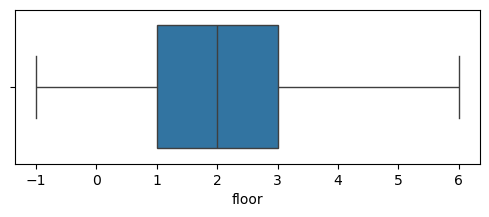

In [1025]:
plt.figure(figsize=(6,2))
sns.boxplot(x = subset_offers['floor'])
plt.show()

#### Check outliers in noRooms

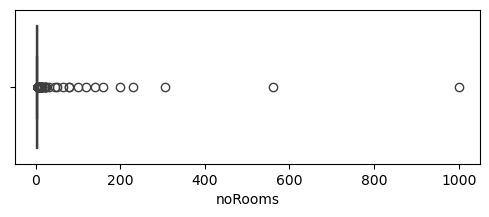

In [1026]:
plt.figure(figsize=(6,2))
sns.boxplot(x = subset_offers['noRooms'])
plt.show()

In [1027]:
# handle those outliers
percentile25 = subset_offers['noRooms'].quantile(0.25)
percentile75 = subset_offers['noRooms'].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = round(percentile75 + 1.5 * iqr,0)

subset_offers.loc[subset_offers['noRooms'] > upper_limit, 'noRooms'] = upper_limit

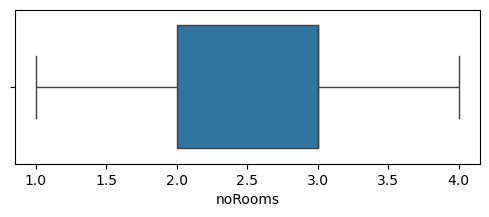

In [1028]:
plt.figure(figsize=(6,2))
sns.boxplot(x = subset_offers['noRooms'])
plt.show()

In [1029]:
subset_offers.value_counts('noRooms')

noRooms
3.00    91237
2.00    88327
4.00    37420
1.00    27557
2.50     9520
3.50     8826
1.50     3378
2.10       67
2.20       32
1.10        5
2.01        4
3.01        2
3.10        2
1.30        1
3.40        1
2.65        1
1.20        1
2.90        1
2.70        1
1.25        1
2.30        1
Name: count, dtype: int64

In [1030]:
# some rows has weird noRooms
# round noRooms to whole or half
subset_offers['noRooms'] = round(subset_offers['noRooms']*2)/2

#### Check outliers in 'yearConstructed'

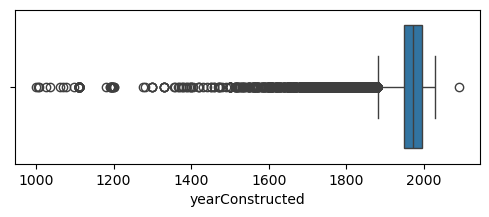

In [1031]:
plt.figure(figsize=(6,2))
sns.boxplot(x = subset_offers['yearConstructed'])
plt.show()

In [1032]:
# handle wrong values
# assign median of 'yearConstructed' to 'yearConstructed' >= 2024
subset_offers.loc[subset_offers['yearConstructed'] >= 2024, 'yearConstructed'] = subset_offers['yearConstructed'].median()

In [1033]:
# take a look at the low values
subset_offers[subset_offers['yearConstructed'] <= 1200]

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,hasKitchen,cellar,baseRent,livingSpace,condition,lift,typeOfFlat,geo_plz,noRooms,floor,garden,regio2,regio3,description,facilities,date
2152,Nordrhein_Westfalen,109.0,central_heating,ONE_YEAR_FREE,False,False,3.45,40.0,580.00,1111.0,NaN,False,True,415.00,59.14,NaN,False,apartment,47229,3.0,1.0,False,Duisburg,Friemersheim,- Modernisiertes Badezimmer\n - Bad mit Fenste...,Isolierverglasung; Kellerraum; Gas-Zentralheiz...,Feb20
2541,Sachsen,53.5,central_heating,NaN,False,True,3.00,NaN,392.50,1111.0,NaN,False,True,290.00,49.50,NaN,False,roof_storey,4249,1.0,NaN,False,Leipzig,Großzschocher,Gerne können Sie einen Besichtigungstermin mit...,Badewanne und Dusche; Türsprechanlage; Isolier...,Feb20
7604,Sachsen,68.0,self_contained_central_heating,ONE_YEAR_FREE,False,True,3.87,40.0,378.12,1111.0,NaN,False,True,310.12,50.84,NaN,False,apartment,4277,2.0,2.0,False,Leipzig,Connewitz,Gerne können Sie einen Besichtigungstermin mit...,Isolierverglasung; Warmwasser zentral (über He...,Feb20
8817,Nordrhein_Westfalen,89.0,central_heating,ONE_YEAR_FREE,False,True,4.66,40.0,719.00,1111.0,NaN,False,True,555.00,66.92,NaN,False,apartment,44803,2.0,1.0,False,Bochum,Altenbochum,NaN,Isolierverglasung; Warmwasser zentral (über He...,Feb20
11923,Sachsen,75.0,central_heating,ONE_YEAR_FREE,False,True,1.72,40.0,568.00,1111.0,NaN,False,True,433.00,58.58,NaN,False,apartment,1157,2.0,1.0,False,Dresden,Cotta,Einen individuellen Besichtigungstermin verein...,Isolierverglasung; Warmwasser zentral (über He...,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255950,Hamburg,92.0,central_heating,ONE_YEAR_FREE,False,False,4.45,10.0,848.23,1111.0,NaN,False,True,681.23,61.93,NaN,False,apartment,21029,2.5,1.0,False,Hamburg,Bergedorf,+ Genießen Sie Ihre Bewegungsfreiheit und Komf...,Isolierverglasung; Warmwasser zentral (über He...,Feb20
258549,Schleswig_Holstein,65.0,central_heating,ONE_YEAR_FREE,False,False,3.27,40.0,313.00,1111.0,NaN,False,True,210.00,24.88,NaN,True,ground_floor,24116,1.0,NaN,False,Kiel,Schreventeich,Schöne und günstige 1-Zimmer-Studentenwohnung ...,Aufzug; Türsprechanlage; Isolierverglasung; Wa...,Feb20
261781,Sachsen,72.0,central_heating,ONE_YEAR_FREE,False,False,4.33,40.0,355.01,1111.0,NaN,False,True,283.01,41.68,NaN,False,ground_floor,4317,1.0,NaN,False,Leipzig,Reudnitz_Thonberg,Gerne können Sie einen Besichtigungstermin mit...,Türsprechanlage; Isolierverglasung; Warmwasser...,Feb20
265442,Berlin,97.0,central_heating,ONE_YEAR_FREE,False,True,6.82,40.0,522.87,1111.0,NaN,False,True,365.87,51.97,NaN,False,apartment,13403,2.0,2.0,False,Berlin,Reinickendorf_Reinickendorf,Eine helle Wohnung mit Balkon und gefliestem W...,Türsprechanlage; Warmwasser zentral (über Heiz...,Feb20


In [1034]:
# rows with yearConstructed = 1111 are likely random input
# can assign median of 'yearConstructed' those data
# subset_offers.loc[subset_offers['yearConstructed'] == 2011, 'yearConstructed'] = subset_offers['yearConstructed'].median()

#### Check 'telekomUploadSpeed'

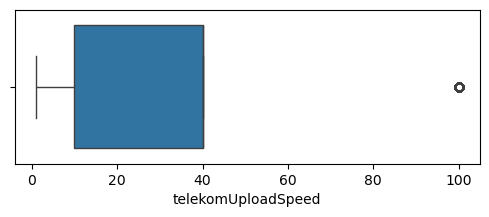

In [1035]:
plt.figure(figsize=(6,2))
sns.boxplot(x = subset_offers['telekomUploadSpeed'])
plt.show()

In [1036]:
subset_offers.value_counts('telekomUploadSpeed')

telekomUploadSpeed
40.0     157523
2.4       42547
10.0      32712
5.0        1031
1.0         209
100.0       140
4.0          61
Name: count, dtype: int64

#### Check 'priceTrend'

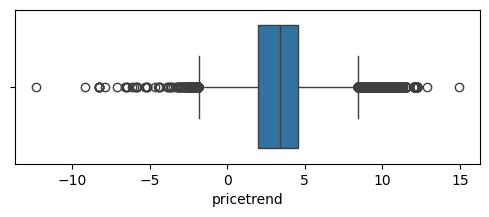

In [1037]:
plt.figure(figsize=(6,2))
sns.boxplot(x = subset_offers['pricetrend'])
plt.show()

I don't have domain knowledge about this measurement so I will just leave it as it is

### Fill NA

In [1038]:
subset_offers.describe()

,serviceCharge,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,baseRent,livingSpace,noRooms,floor
count,266385.000000,266385.00000,234223.000000,266385.000000,209851.000000,266385.000000,266385.000000,266385.000000,215552.000000
mean,146.613317,3.38943,28.817669,808.587335,1966.258369,645.291426,73.399897,2.581228,2.048624
std,71.580591,1.96435,16.331038,541.589249,47.006574,495.496249,31.770276,0.869901,1.432018
min,0.000000,-12.33000,1.000000,1.000000,1000.000000,1.000000,5.580000,1.000000,-1.000000
25%,96.000000,2.00000,10.000000,466.000000,1950.000000,338.000000,54.000000,2.000000,1.000000
50%,139.230000,3.39000,40.000000,645.000000,1972.000000,490.000000,67.210000,3.000000,2.000000
75%,185.000000,4.57000,40.000000,980.000000,1996.000000,795.000000,86.700000,3.000000,3.000000
max,332.262500,14.92000,100.000000,13407.262500,2022.000000,13000.000000,446.000000,4.000000,6.000000


In [1039]:
# Fill missing values in numerical column with their mean
subset_offers[subset_offers.select_dtypes(include='number').columns] = subset_offers.select_dtypes(include='number').apply(lambda col: col.fillna(col.median()))

In [1040]:
subset_offers.describe()

,serviceCharge,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,baseRent,livingSpace,noRooms,floor
count,266385.000000,266385.00000,266385.000000,266385.000000,266385.000000,266385.000000,266385.000000,266385.000000,266385.000000
mean,146.613317,3.38943,30.167768,808.587335,1967.476896,645.291426,73.399897,2.581228,2.039345
std,71.580591,1.96435,15.740929,541.589249,41.787414,495.496249,31.770276,0.869901,1.288301
min,0.000000,-12.33000,1.000000,1.000000,1000.000000,1.000000,5.580000,1.000000,-1.000000
25%,96.000000,2.00000,10.000000,466.000000,1958.000000,338.000000,54.000000,2.000000,1.000000
50%,139.230000,3.39000,40.000000,645.000000,1972.000000,490.000000,67.210000,3.000000,2.000000
75%,185.000000,4.57000,40.000000,980.000000,1992.000000,795.000000,86.700000,3.000000,3.000000
max,332.262500,14.92000,100.000000,13407.262500,2022.000000,13000.000000,446.000000,4.000000,6.000000


In [1041]:
# the 2 features 'description' and 'facilities' are text-based, can extract numerical features from it with NLP technics 
# fill NA in description and facilities with empty space string
subset_offers.fillna({'description': " ", 'facilities': " "}, inplace=True)

In [1042]:
# the other columns with NA are categorical variables
# fill NA with "missing value"
subset_offers[subset_offers.select_dtypes('object').columns] = subset_offers.select_dtypes('object').apply(lambda col: col.fillna("missing value"))

In [1043]:
check_na(subset_offers)

,Column,Missing Values,Percentage Missing,Data Type
0,regio1,0,0.0,object
1,livingSpace,0,0.0,float64
2,facilities,0,0.0,object
3,description,0,0.0,object
4,regio3,0,0.0,object
5,regio2,0,0.0,object
6,garden,0,0.0,bool
7,floor,0,0.0,float64
8,noRooms,0,0.0,float64
9,geo_plz,0,0.0,object


# Analyze

## Coutinue EDA

### Check for strong correlations between continuous variables

In [1044]:
continuous_var = ['totalRent','baseRent','serviceCharge','livingSpace','yearConstructed','pricetrend']

# correlation matrix
subset_offers[continuous_var].corr(numeric_only=True)

,totalRent,baseRent,serviceCharge,livingSpace,yearConstructed,pricetrend
totalRent,1.000000,0.993931,0.644357,0.743388,0.158432,0.429208
baseRent,0.993931,1.000000,0.567742,0.711816,0.153388,0.435019
serviceCharge,0.644357,0.567742,1.000000,0.657598,0.123581,0.219648
livingSpace,0.743388,0.711816,0.657598,1.000000,0.057741,0.161511
yearConstructed,0.158432,0.153388,0.123581,0.057741,1.000000,0.117560
pricetrend,0.429208,0.435019,0.219648,0.161511,0.117560,1.000000


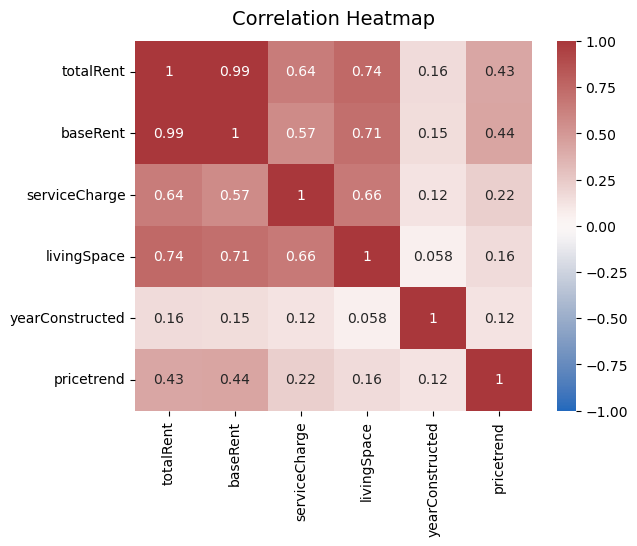

In [1045]:
# correlation heatmap
heatmap = sns.heatmap(subset_offers[continuous_var].corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

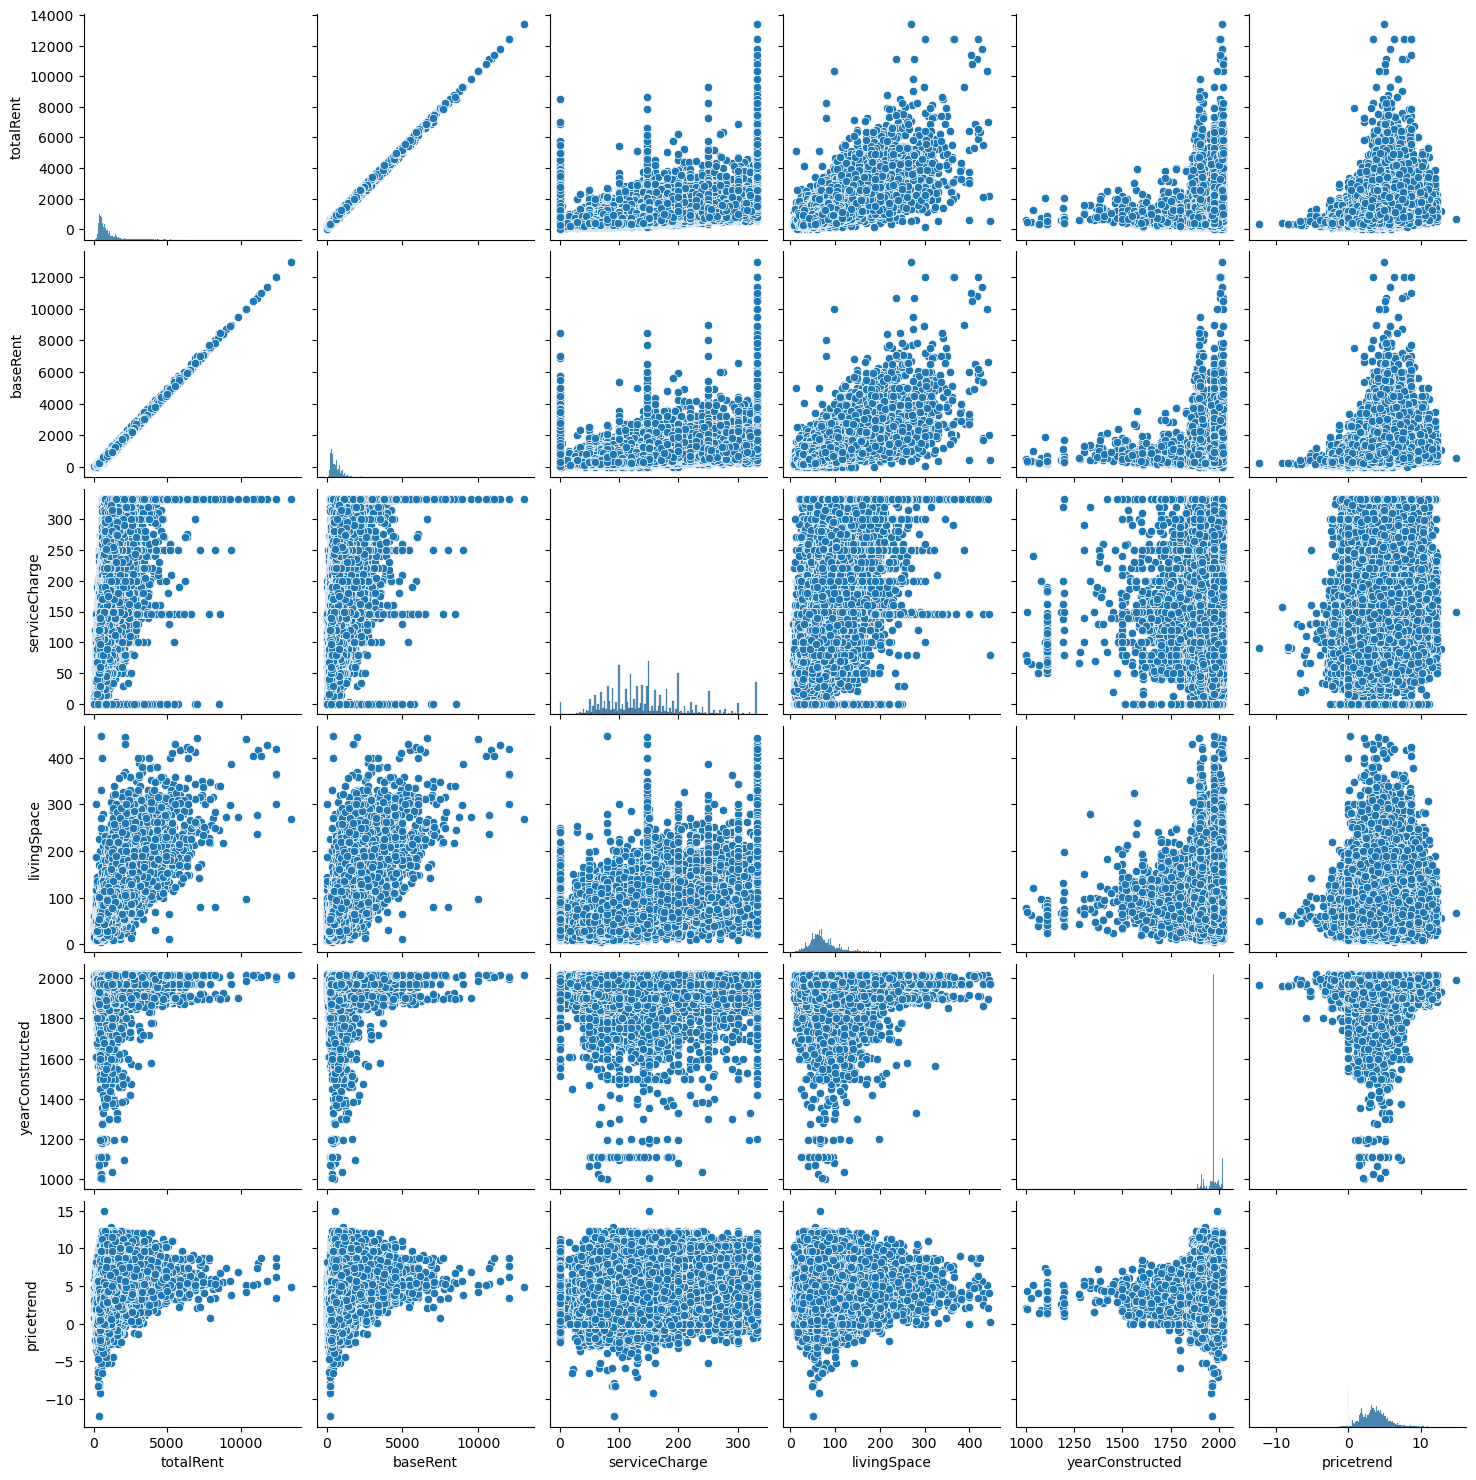

In [1046]:
# inspect the relationship between variable
sns.pairplot(subset_offers[continuous_var]);

Look like these is no clearly linear correlation

### Inspect boolen features newConst, balcony, lift, hasKitchen, cellar, garden

In [1047]:
boolean_columns = ['balcony', 'cellar', 'lift', 'hasKitchen', 'garden', 'newlyConst']
mean_rent_df = pd.DataFrame()

for col in boolean_columns:
    grouped_means = subset_offers[[col,'baseRent']].groupby(col)['baseRent'].mean().reset_index()
    grouped_means['Column'] = col
    grouped_means.columns = ['Value','Mean Base Rent','Feature']
    mean_rent_df = pd.concat([mean_rent_df,grouped_means],axis=0)

mean_rent_df = mean_rent_df[['Feature','Value','Mean Base Rent']]
mean_rent_df

,Feature,Value,Mean Base Rent
0,balcony,False,491.918552
1,balcony,True,740.765765
0,cellar,False,632.790691
1,cellar,True,652.303678
0,lift,False,563.118731
1,lift,True,913.587420
0,hasKitchen,False,549.156358
1,hasKitchen,True,830.833291
0,garden,False,636.277392
1,garden,True,682.292445


In [1048]:
mean_charge_df = pd.DataFrame()
for col in boolean_columns:
    grouped_means = subset_offers[[col,'serviceCharge']].groupby(col)['serviceCharge'].mean().reset_index()
    grouped_means['Column'] = col
    grouped_means.columns = ['Value','Mean Service Charge','Feature']
    mean_charge_df = pd.concat([mean_charge_df,grouped_means],axis=0)

mean_charge_df = mean_charge_df[['Feature','Value','Mean Service Charge']]
mean_charge_df

,Feature,Value,Mean Service Charge
0,balcony,False,124.835965
1,balcony,True,160.169680
0,cellar,False,139.591483
1,cellar,True,150.552195
0,lift,False,136.126544
1,lift,True,180.852904
0,hasKitchen,False,139.561961
1,hasKitchen,True,160.222522
0,garden,False,144.761888
1,garden,True,154.213106


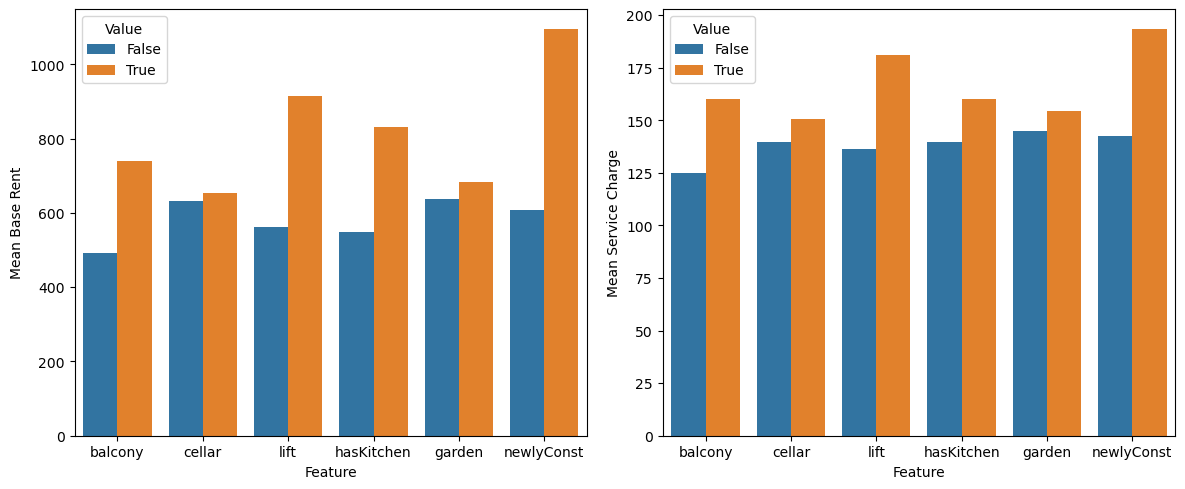

In [1049]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data=mean_rent_df,x='Feature',y='Mean Base Rent',hue='Value', ax=axes[0])

sns.barplot(data=mean_charge_df,x='Feature',y='Mean Service Charge',hue='Value', ax=axes[1])

plt.tight_layout()
plt.show()

### Inspect futher the relationship between categorical features heatingType, firingTypes, condition, typeOfFlat, noRooms, floor with totalRent                    

/var/folders/p6/w13x_cwn5dg7617yq76q38kh0000gn/T/ipykernel_21848/3848793684.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/p6/w13x_cwn5dg7617yq76q38kh0000gn/T/ipykernel_21848/3848793684.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/p6/w13x_cwn5dg7617yq76q38kh0000gn/T/ipykernel_21848/3848793684.py:16: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



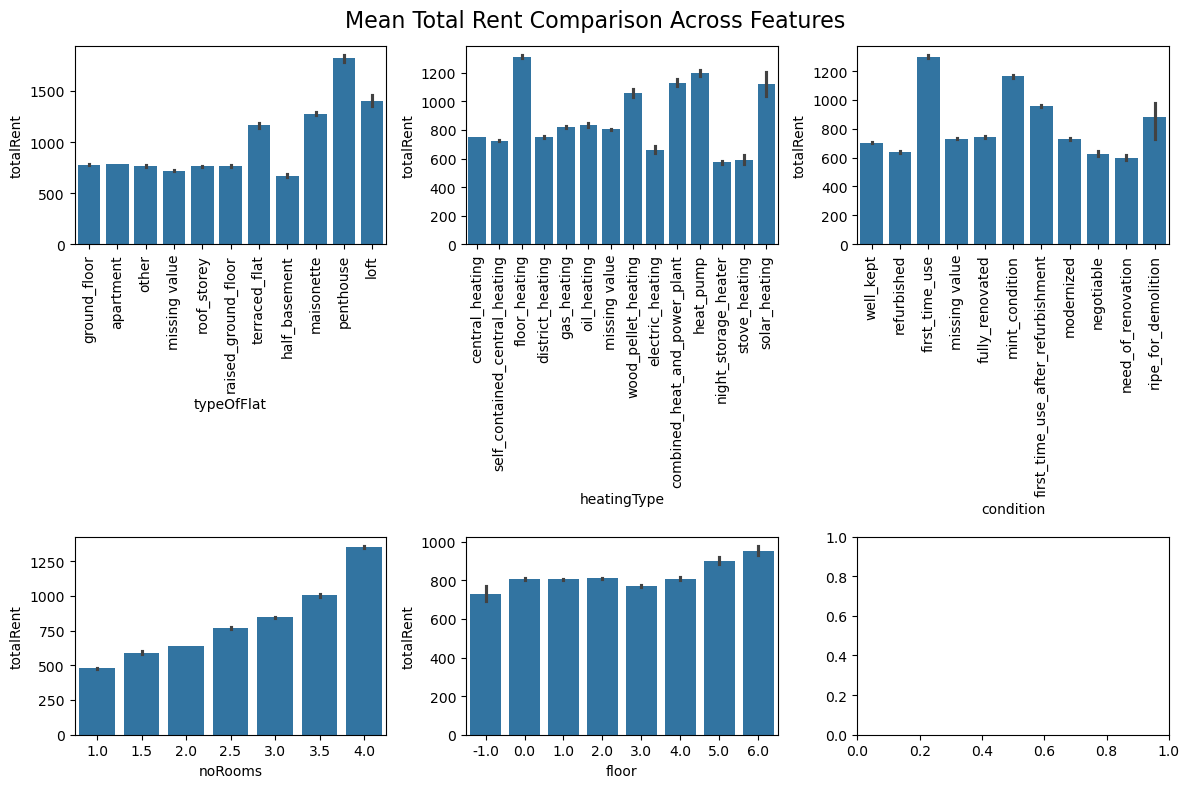

In [1050]:
# lets see how the relatition
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

sns.barplot(data=subset_offers, x='noRooms', y='totalRent', ax=axes[1,0])

sns.barplot(data=subset_offers, x='floor', y='totalRent', ax=axes[1,1])

sns.barplot(data=subset_offers, x='typeOfFlat', y='totalRent', ax=axes[0,0])
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)


sns.barplot(data=subset_offers, x='heatingType', y='totalRent', ax=axes[0,1])
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)

sns.barplot(data=subset_offers, x='condition', y='totalRent', ax=axes[0,2])
axes[0,2].set_xticklabels(axes[0,2].get_xticklabels(), rotation=90)
# axes[0,2].set_title('Total Rent by Condition')

plt.suptitle('Mean Total Rent Comparison Across Features', fontsize=16)
plt.tight_layout()
plt.show()

/var/folders/p6/w13x_cwn5dg7617yq76q38kh0000gn/T/ipykernel_21848/3393995255.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/p6/w13x_cwn5dg7617yq76q38kh0000gn/T/ipykernel_21848/3393995255.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/p6/w13x_cwn5dg7617yq76q38kh0000gn/T/ipykernel_21848/3393995255.py:15: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



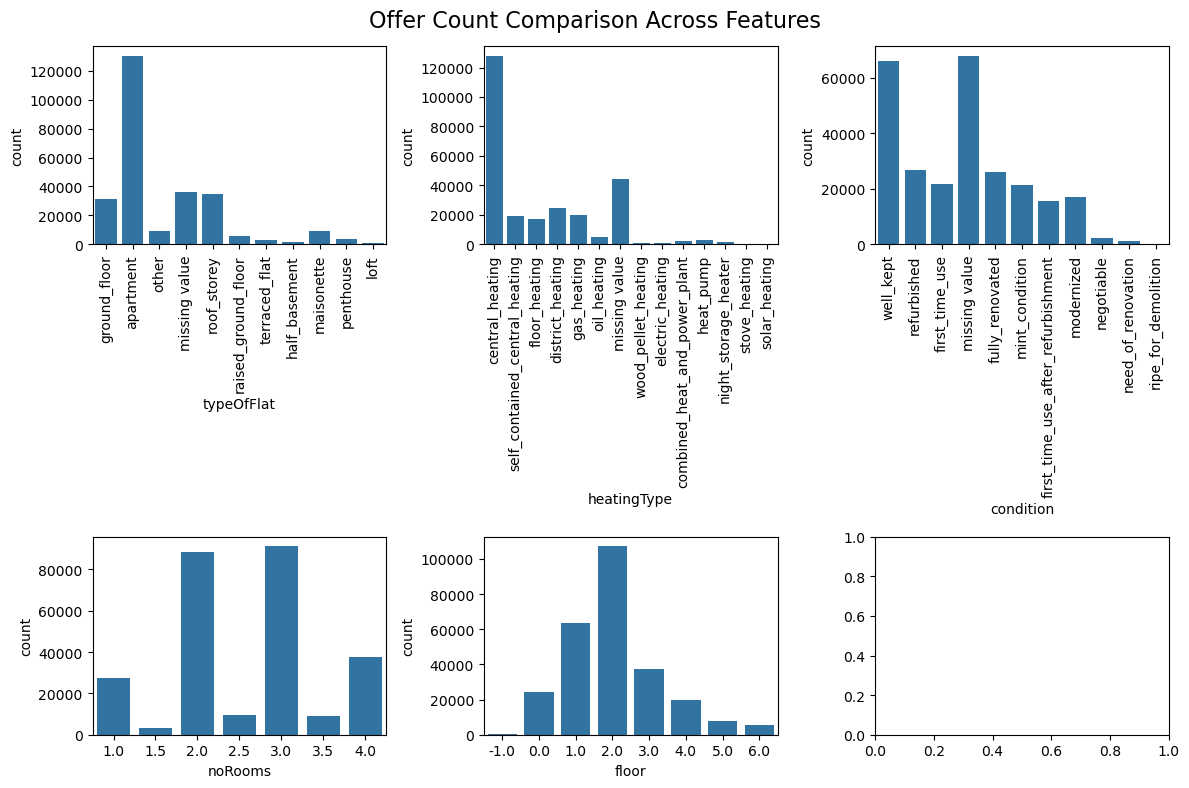

In [1051]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

sns.countplot(data=subset_offers, x='noRooms', ax=axes[1,0])

sns.countplot(data=subset_offers, x='floor', ax=axes[1,1])

sns.countplot(data=subset_offers, x='typeOfFlat', ax=axes[0,0])
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)


sns.countplot(data=subset_offers, x='heatingType', ax=axes[0,1])
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)

sns.countplot(data=subset_offers, x='condition', ax=axes[0,2])
axes[0,2].set_xticklabels(axes[0,2].get_xticklabels(), rotation=90)

plt.suptitle('Offer Count Comparison Across Features', fontsize=16)
plt.tight_layout()
plt.show()

In [1052]:
subset_offers.groupby('firingTypes').mean('totalRent')[['totalRent']].sort_values(by='totalRent',ascending=False).reset_index() 

,firingTypes,totalRent
0,district_heating:combined_heat_and_power_fossi...,2750.000000
1,oil:environmental_thermal_energy,2682.262500
2,gas:steam_district_heating,2617.262500
3,natural_gas_heavy:local_heating,2567.262500
4,district_heating:local_heating:combined_heat_a...,2350.000000
...,...,...
127,gas:liquid_gas,418.000000
128,coal,400.162973
129,electricity:coal,395.500000
130,district_heating:heat_supply,316.500000


### Location features

In [1053]:
mean_rent_regio = subset_offers.groupby('regio1').mean('totalRent')[['totalRent']].sort_values(by='totalRent',ascending=False).reset_index() 
mean_rent_regio

,regio1,totalRent
0,Hamburg,1370.975260
1,Berlin,1364.430204
2,Bayern,1190.777572
3,Hessen,1169.184672
4,Baden_Württemberg,1125.420299
5,Rheinland_Pfalz,843.694853
6,Schleswig_Holstein,815.163044
7,Nordrhein_Westfalen,770.249923
8,Bremen,765.838660
9,Niedersachsen,756.954810


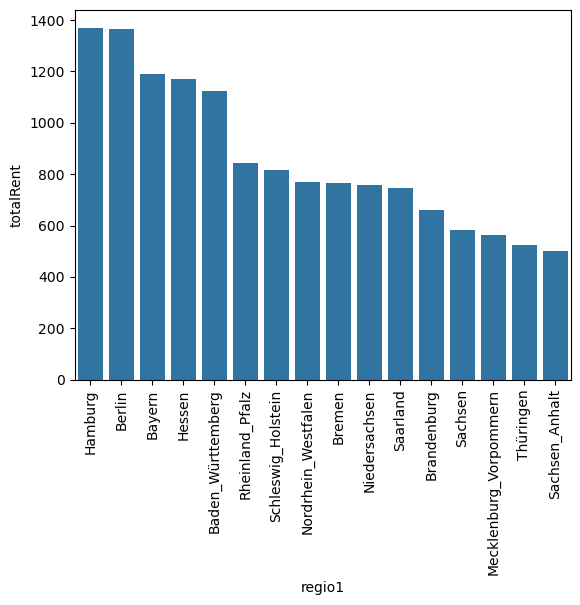

In [1054]:
sns.barplot(data=mean_rent_regio, x=mean_rent_regio['regio1'],y=mean_rent_regio['totalRent'])
plt.xticks(rotation=90);

Visualize the result with map plot

In [1055]:
count_regio = subset_offers.value_counts('regio1').reset_index()
count_regio

,regio1,count
0,Nordrhein_Westfalen,62487
1,Sachsen,57826
2,Bayern,21400
3,Sachsen_Anhalt,20018
4,Hessen,17628
5,Niedersachsen,16474
6,Baden_Württemberg,15803
7,Berlin,10356
8,Thüringen,8310
9,Rheinland_Pfalz,8254


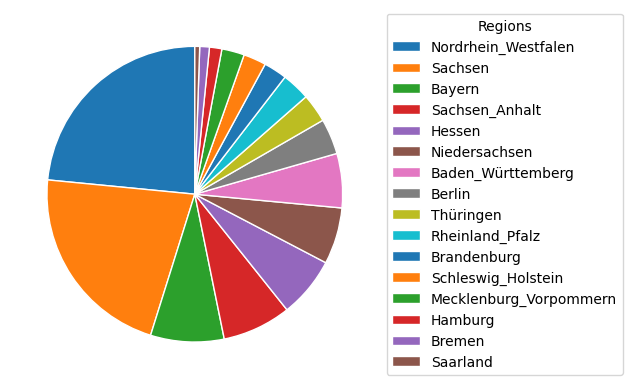

In [1056]:
plt.pie(count_regio['count'], labels=None, startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.legend(count_regio['regio1'],title="Regions", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10);

## Insight

- There is no strong correlation between continuous features
- Type of Flat: terraced flat, maisonette, penthouse and loft have highest average total rent, Apartment has the most offers, the offers amount significantly higher
- Heating Type: the average total rent distribute evenly across heating type, slightly higher by wood_pellet_heating, solar_heating, combined_heat_and_power_plant, heat_pump, floor_heating in order. The most offers have central heating
- Condition: the average total rent distribute evenly across condition, slightly higher by ripe_for_demolition (odd), first_time_use_after_refurbishment, mint_condition, first_time_use in order. The most offers have well kept condition
- Number of Rooms: the more room it has the higher the price. Most apartments have 2-3 rooms
- Floor: the average total rent distribute evenly. Rent is slightly higher when the apartment is on higher floor  
- Rent and service charge is significantly higher when the apartment has balcony, cellar, lift, garden, kitchen and ist newly constructed
- Hamburg, Berlin, Bayern have highest avg rent, Thüringen and Sachsen_Anhalt lowest. There are not so many offers in Hamburg, that explains the high price there	

## Feature Engineering

Create new features: 'descLen', 'facLen' are text length of 'description' and 'facilities' to extract numerical features from text based data

In [1057]:
subset_offers['descLen'] = subset_offers['description'].apply(lambda col: len(" ".join(col.split())))
subset_offers['facLen'] = subset_offers['facilities'].apply(lambda col: len(" ".join(col.split())))

To analyzing price efficiency I create feature representing the price per square meter from the totalRent and livingSpace in square meters

In [1058]:
subset_offers['totalRentPerSqMeter'] = subset_offers['totalRent'] / subset_offers['livingSpace']

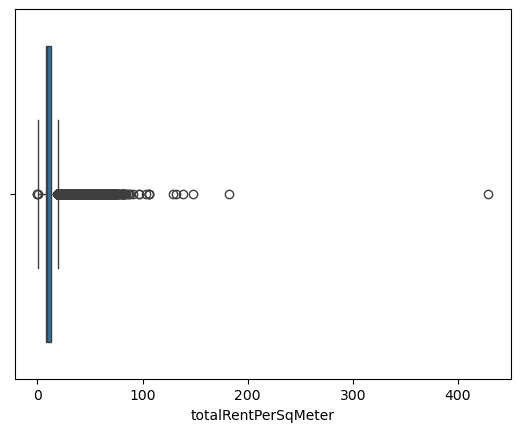

In [1059]:
# inspect new feature
sns.boxplot(data=subset_offers,x=subset_offers['totalRentPerSqMeter']);

In [1060]:
subset_offers[subset_offers['totalRentPerSqMeter'] > 100]

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,hasKitchen,cellar,baseRent,livingSpace,condition,lift,typeOfFlat,geo_plz,noRooms,floor,garden,regio2,regio3,description,facilities,date,descLen,facLen,totalRentPerSqMeter
16581,Baden_Württemberg,146.606876,missing value,ONE_YEAR_FREE,False,False,4.57,40.0,1781.606876,1972.0,missing value,False,False,1560.00,12.00,missing value,False,apartment,76448,1.0,2.0,False,Rastatt_Kreis,Durmersheim,EINZELBETTEN UND ETAGENBETTEN MÖGLICH !!! \n\n...,,Feb20,1187,0,148.467240
26559,Brandenburg,146.606876,missing value,ONE_YEAR_FREE,False,False,5.36,40.0,4166.606876,1972.0,missing value,False,True,4020.00,30.00,missing value,False,other,15306,2.0,2.0,False,Märkisch_Oderland_Kreis,Seelow,"Lorem ipsum dolor sit amet, consectetur adipis...",,May19,445,0,138.886896
27091,Brandenburg,146.606876,missing value,ONE_YEAR_FREE,False,False,3.57,2.4,2646.606876,1972.0,missing value,False,False,2500.00,25.00,missing value,False,roof_storey,15306,1.0,5.0,False,Märkisch_Oderland_Kreis,Seelow,testobjekt - nicht kontaktieren,,Sep18,31,0,105.864275
55299,Berlin,220.000000,central_heating,ONE_YEAR_FREE,False,True,9.18,40.0,1119.330000,1998.0,district_heating,False,True,899.33,8.65,well_kept,True,apartment,13055,3.0,2.0,False,Berlin,Alt_Hohenschönhausen_Hohenschönhausen,Das Wohngebiet ist mittlerweile für sein „Schö...,Die Wohnung verfügt über eine Spüle und einen ...,May19,558,819,129.402312
99916,Sachsen_Anhalt,250.000000,floor_heating,missing value,False,True,3.43,40.0,8250.000000,1920.0,bio_energy,True,True,8000.00,80.00,refurbished,True,roof_storey,39624,3.0,6.0,True,Altmarkkreis_Salzwedel,Güssefeld,Testobjekt - bitte nicht kontaktieren. \nLorem...,Testobjekt - bitte nicht kontaktieren. \nLorem...,Feb20,630,630,103.125000
101696,Hessen,150.000000,floor_heating,ON_DEMAND,False,True,6.33,2.4,1800.000000,2007.0,gas,False,False,1650.00,17.00,well_kept,False,terraced_flat,64646,4.0,0.0,True,Bergstraße_Kreis,Heppenheim_Bergstraße,"Stellplatz im Carport,Garten mit Terrasse, 3Ta...",Fliesenböden und Parkett \nDas große Bad verfü...,Sep18,98,139,105.882353
145100,Brandenburg,146.606876,missing value,ONE_YEAR_FREE,False,False,3.57,2.4,5146.606876,1972.0,missing value,False,False,5000.00,12.00,missing value,False,missing value,15306,1.0,2.0,False,Märkisch_Oderland_Kreis,Seelow,,,Sep18,0,0,428.883906
156430,Baden_Württemberg,50.000000,central_heating,ONE_YEAR_FREE,False,False,3.96,10.0,2550.000000,1956.0,oil,False,False,2500.00,14.00,missing value,False,apartment,76133,1.0,3.0,False,Karlsruhe,Weststadt,kommen Sie einfach an dem Besichtigungstermin ...,"Vollbad, Laminat\n\nBemerkungen:\nZimmer ist m...",May19,634,186,182.142857
260286,Bayern,300.000000,central_heating,ONE_YEAR_FREE,False,True,1.90,2.4,1315.000000,1969.0,gas,False,True,990.00,10.00,well_kept,False,apartment,85057,4.0,2.0,False,Ingolstadt,Nordwest,Die Wohnung befindet sich in einem Mischgebäud...,"Laminatböden, Tageslichtbad mit Wanne und Wasc...",Sep18,162,193,131.500000
263502,Niedersachsen,332.262500,central_heating,missing value,False,True,4.27,40.0,10331.262500,1989.0,gas,True,True,9999.00,97.60,fully_renovated,False,terraced_flat,30966,3.0,0.0,True,Hannover_Kreis,Hemmingen,In geschützter und sehr attraktiver Lage befin...,"Terrasse, Garten, Keller, Vollbad, Einbauküche...",Oct19,347,686,105.853099


In [1061]:
# remove rows with over 100 for a square meter
subset_offers = subset_offers[subset_offers['totalRentPerSqMeter'] <= 100]

In [1062]:
price_regio = subset_offers.groupby(['regio1','noRooms']).mean('totalRentPerSqMeter')[['totalRentPerSqMeter']].sort_values(by='totalRentPerSqMeter',ascending=False).reset_index() 
price_regio

,regio1,noRooms,totalRentPerSqMeter
0,Hessen,1.0,22.943178
1,Bayern,1.0,22.595619
2,Hamburg,1.0,22.281476
3,Baden_Württemberg,1.0,22.079226
4,Berlin,1.0,21.331743
...,...,...,...
107,Thüringen,4.0,7.945252
108,Sachsen_Anhalt,4.0,7.882215
109,Thüringen,3.0,7.841691
110,Sachsen_Anhalt,2.5,7.741438


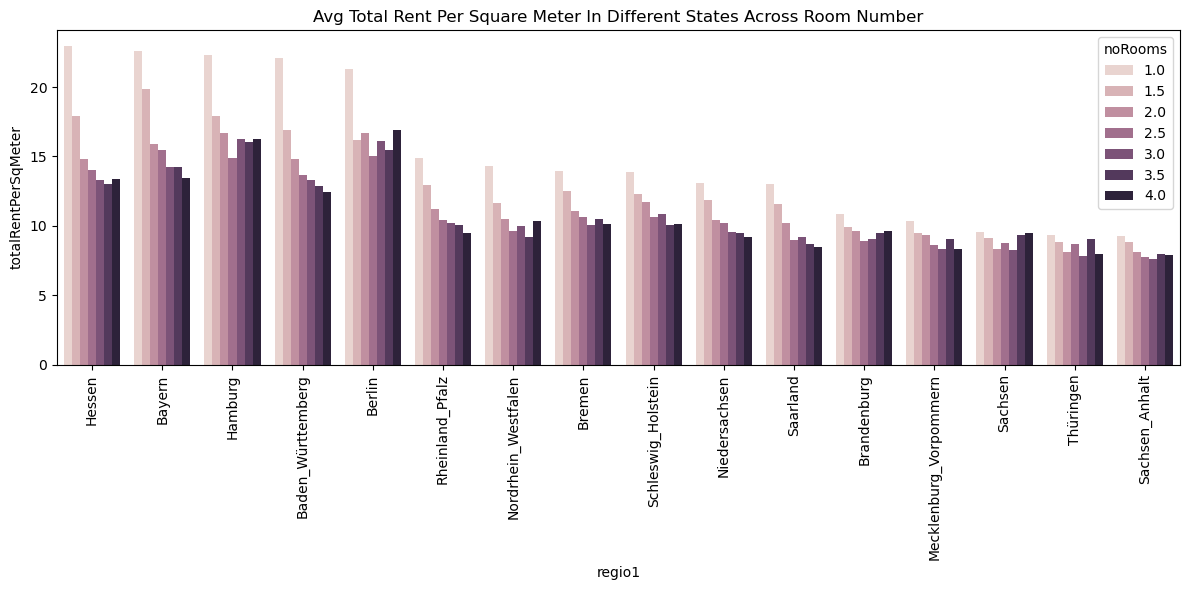

In [1063]:
plt.figure(figsize=(12,6))
sns.barplot(data=price_regio, x='regio1', y='totalRentPerSqMeter',hue='noRooms')
plt.xticks(rotation = 90)
plt.title('Avg Total Rent Per Square Meter In Different States Across Room Number')
plt.tight_layout()
plt.show();

In [1064]:
mean_rent_regio_room = subset_offers.groupby(['regio1','noRooms']).mean('totalRent')[['totalRent']].sort_values(by='totalRent',ascending=False).reset_index() 
mean_rent_regio_room

,regio1,noRooms,totalRent
0,Berlin,4.0,2453.289327
1,Hamburg,4.0,2225.913060
2,Hessen,4.0,1772.736348
3,Bayern,4.0,1728.361316
4,Hamburg,3.5,1709.739396
...,...,...,...
107,Thüringen,1.5,377.192632
108,Mecklenburg_Vorpommern,1.0,335.423469
109,Sachsen,1.0,330.970498
110,Sachsen_Anhalt,1.0,322.384215


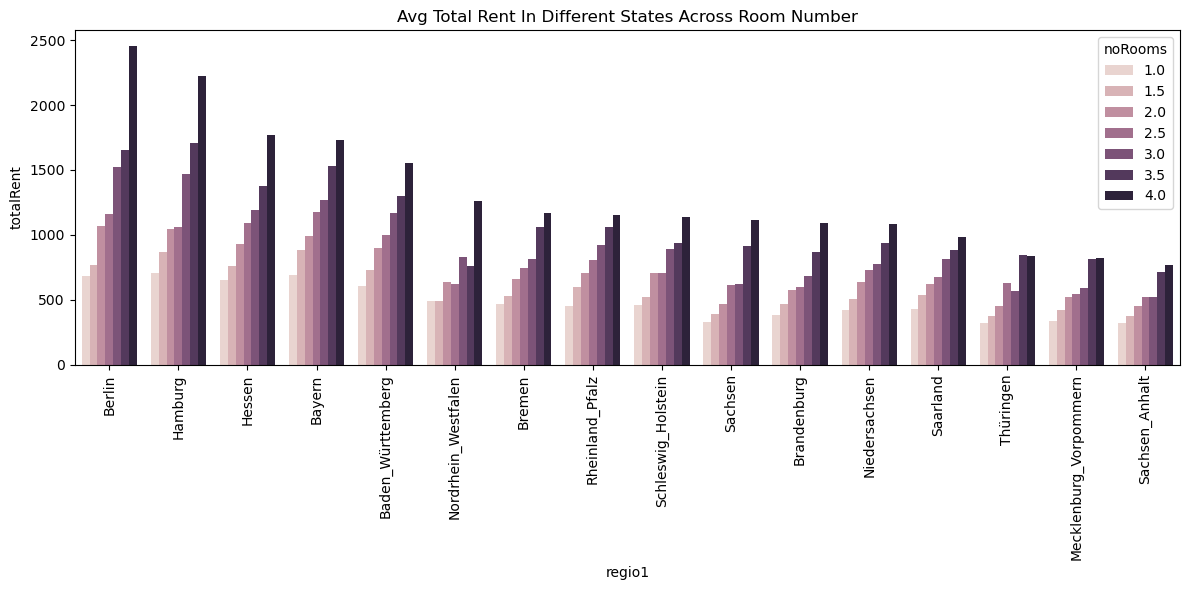

In [1065]:
plt.figure(figsize=(12,6))
sns.barplot(data=mean_rent_regio_room, x='regio1', y='totalRent',hue='noRooms')
plt.xticks(rotation = 90)
plt.title('Avg Total Rent In Different States Across Room Number')
plt.tight_layout()
plt.show();

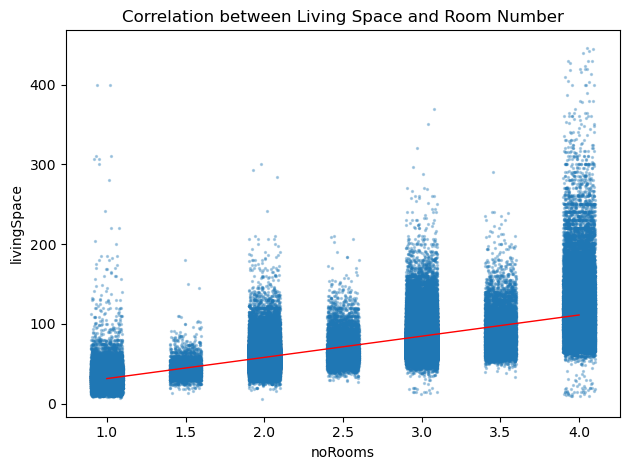

In [1066]:
sns.regplot(data=subset_offers, x='noRooms', y='livingSpace',x_jitter = 0.1,line_kws=dict(lw=1,color="r"),scatter_kws=dict(alpha=0.3, s=2))
plt.title('Correlation between Living Space and Room Number')
plt.tight_layout();

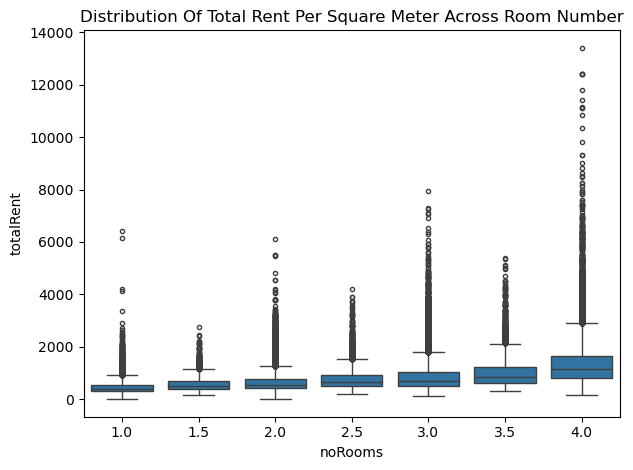

In [1067]:
sns.boxplot(data=subset_offers, x='noRooms', y='totalRent',fliersize=3)
plt.title('Distribution Of Total Rent Per Square Meter Across Room Number')
plt.tight_layout()


- Bigger appartment obviously has more rooms
- The more you pay the bigger apartment you get. But you tend to pay less for a square meter in the bigger apartment. This can be seen in most states
- Avg total rent per square meter for 1 room apartment or a room in shared flat is extremely high in Hessen, Bayern, Hamburg, Baden Wütternberg and Berlin. If you have the budget and want to live there, try to get a bigger apartment with more rooms for better price efficiency

In [1068]:
# save clean data to a file to do visualization in Tableau
cleaned_data = subset_offers.drop(['descLen','facLen'],axis=1)
cleaned_data.to_csv('cleaned_data.csv')

# Construct

## Variable Selection

In [1069]:
# outcome variable
y = subset_offers['totalRent']

# select features
x = subset_offers.drop(['totalRent','serviceCharge','baseRent','description','facilities','date','totalRentPerSqMeter'],axis=1)

In [1070]:
# split the data into training, validation and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [1071]:
# get shape of each training, validation and testing set
x_tr.shape, x_val.shape, x_test.shape, y_tr.shape, y_val.shape, y_test.shape

((170480, 23), (42620, 23), (53275, 23), (170480,), (42620,), (53275,))

In [1072]:
# store the category columns names 
cat_features = list(x_tr.select_dtypes(['object', 'bool']).columns)
cat_features

['regio1',
 'heatingType',
 'telekomTvOffer',
 'newlyConst',
 'balcony',
 'firingTypes',
 'hasKitchen',
 'cellar',
 'condition',
 'lift',
 'typeOfFlat',
 'geo_plz',
 'garden',
 'regio2',
 'regio3']

In [1073]:
# create Pool object
train_pool = Pool(data = x_train, label = y_train, cat_features = cat_features)
tr_pool = Pool(data = x_tr, label = y_tr, cat_features = cat_features)
val_pool = Pool(data = x_val, label = y_val, cat_features = cat_features)
test_pool = Pool(data = x_test, label = y_test, cat_features = cat_features)

## Model training

I use randomzied and grid search to find the good initial set of hyperparameter to start with. They take a very long time to run so you can skip those step and start with the results 

### Randomized search

In [1074]:
# THIS STEP TAKE A LOT OF TIME TO RUN. IT CAN BE SKIPPED
# # Initialize the CatBoostRegressor 
# initial_model = CatBoostRegressor(cat_features = cat_features, loss_function = 'MAE', logging_level = 'Silent') 

# # create hyperparameter for randomized search
# initial_grid = {'learning_rate': [0.02, 0.04, 0.06, 0.08, 0.1], #0.03
#         'depth': [2, 4, 6, 8, 10], #6 
#         'l2_leaf_reg': [1, 3, 5, 7, 9], #3
#         'n_estimators':[200, 400, 600, 800, 1000]} #1000

# # randomized search
# randomized_search_result = initial_model.randomized_search(initial_grid, tr_pool, n_iter = 100, partition_random_seed = 42, cv = 5, refit = False, plot = True, plot_file='randomized_search_result.html')

In [1075]:
# # best hyperparameter set from randomized search
# # {'depth': 10, 'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 1000}
# randomized_search_result['params']

### Grid Search

Try another sets of hyperparameter which is close to the set with best result from randomized search

In [1076]:
# THIS STEP TAKE A LOT OF TIME TO RUN. IT CAN BE SKIPPED
# # create hyperparameter for grid search
# tuning_grid = {'learning_rate': [0.08, 0.09, 0.1], 
#         'depth': [8, 9, 10], 
#         'l2_leaf_reg': [5, 6, 7], 
#         'n_estimators':[800, 900, 1000]} 

# # grid search
# grid_search_result = initial_model.grid_search(tuning_grid, tr_pool, partition_random_seed = 42, cv = 5, refit = False, plot = True, plot_file='grid_search_result.html')

In [1078]:
# look at the detail of cross validation of parameter set with best result from grid search
# params = {
#     'cat_features' : cat_features, 
#     'loss_function' : 'MAE', 
#     'logging_level' : 'Silent',
#     'learning_rate': 0.09, 
#     'depth': 10, 
#     'l2_leaf_reg': 6, 
#     'n_estimators': 1000} 

# score = cv(pool=tr_pool,params=params,fold_count = 5,partition_random_seed=42,plot=True)

In [1077]:
# # extract best hyperparameter set from grid search
# # iterations = 1000, depth = 10, learning_rate = 0.09, l2_leaf_reg = 6 
# best_params = grid_search_result['params']
# best_params

In [1079]:
# # update the parameter set in CBRegeressor object with best hyperparameter 
# initial_model.set_params(**best_params)

# # manual refit model 
# initial_model.fit(tr_pool, eval_set = val_pool,plot=True, plot_file = 'initial_training_progeress.html');

In [1080]:
# RUN THIS CELL IF YOU DONT WANT TO RERUN RANDOMIZED AND GRID SEARCH
initial_model = CatBoostRegressor(
    cat_features = cat_features, 
    loss_function = 'MAE', 
    logging_level = 'Silent',
    iterations = 1000, 
    depth = 10, 
    learning_rate = 0.09, 
    l2_leaf_reg = 6)

# manual refit model with training dataset, use validation dataset to monitor the performance 
initial_model.fit(tr_pool, eval_set = val_pool, plot = True, plot_file = 'initial_training_progeress.html');

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Execute

## Evaluate models

In [1081]:
initial_model.best_score_

{'learn': {'MAE': 71.72497211171705}, 'validation': {'MAE': 87.64220676782618}}

It is normal that the model performs a little bit worse on validation set than on training set, but overfitting may occur. I will try to reduce overfitting

In [1082]:
# save model
initial_model.save_model(fname='catboost_model')

In [1083]:
# load model
#initial_model.load_model('catboost_model');

In [1084]:
# function to calculate evaluation metrics from model on dataset (x,y)
def print_result(model_name,model_object,x,y):
    y_pred = model_object.predict(x)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    result_df = pd.DataFrame({'Model': [model_name], 'MAE': [mae], 'MSE': [mse], 'RMSE': [rmse], 'R2': [r2]})
    return result_df


In [1085]:
# create result table
catboost_result = print_result('CatBoost',initial_model,x_val,y_val)
catboost_result

,Model,MAE,MSE,RMSE,R2
0,CatBoost,87.642207,27016.565245,164.367166,0.90853


In [1086]:
# save table as csv
catboost_result.to_csv("results.csv",index=False)

## Model tuning

#### Feature Importance Analysis

In [1087]:
# get feature importance
feature_importance = initial_model.get_feature_importance()
feature_names = x_train.columns 

# create a DataFrame 
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# print the feature importance
print(importance_df)

               Feature  Importance
11         livingSpace   35.897064
19              regio2   20.519661
0               regio1    5.444108
7      yearConstructed    4.403163
12           condition    3.719614
20              regio3    3.509663
15             geo_plz    3.388490
21             descLen    3.061526
5           pricetrend    2.808838
13                lift    2.418671
1          heatingType    2.268262
22              facLen    2.162324
14          typeOfFlat    2.105152
8          firingTypes    2.104441
9           hasKitchen    1.651026
16             noRooms    1.087914
17               floor    0.817802
2       telekomTvOffer    0.814976
4              balcony    0.567131
10              cellar    0.535408
6   telekomUploadSpeed    0.309180
3           newlyConst    0.242964
18              garden    0.162620


Remove features to reduce model complexity

In [1088]:
# remove the 3 least important features 
removed_features = importance_df.tail(3)['Feature']

# remove those feature from x_tr
x_tr.drop(removed_features,axis=1,inplace=True)
x_val.drop(removed_features,axis=1,inplace=True)


In [1089]:
# update cat_features
updated_cat_features= [feature for feature in cat_features if feature not in list(removed_features)]
updated_cat_features

['regio1',
 'heatingType',
 'telekomTvOffer',
 'balcony',
 'firingTypes',
 'hasKitchen',
 'cellar',
 'condition',
 'lift',
 'typeOfFlat',
 'geo_plz',
 'regio2',
 'regio3']

In [1090]:
# update Pool object
tr_pool = Pool(data = x_tr, label = y_tr, cat_features = updated_cat_features)
val_pool = Pool(data = x_val, label = y_val, cat_features = updated_cat_features)

In [1091]:
# get the best hyperparameters of the last model
initial_model.get_params()

{'iterations': 1000,
 'learning_rate': 0.09,
 'depth': 10,
 'l2_leaf_reg': 6,
 'loss_function': 'MAE',
 'logging_level': 'Silent',
 'cat_features': ['regio1',
  'heatingType',
  'telekomTvOffer',
  'newlyConst',
  'balcony',
  'firingTypes',
  'hasKitchen',
  'cellar',
  'condition',
  'lift',
  'typeOfFlat',
  'geo_plz',
  'garden',
  'regio2',
  'regio3']}

In [1092]:
# train model with changed data
# initialize the CatBoostRegressor 
tuned_model = CatBoostRegressor(
    cat_features = updated_cat_features, 
    loss_function='MAE', 
    logging_level = 'Silent',
    random_state = 42, 
    iterations = 1000, 
    depth = 10, 
    learning_rate = 0.09, 
    l2_leaf_reg = 6 
)

# train model
tuned_model.fit(tr_pool, eval_set = val_pool, plot = True, plot_file = 'tuned_training_progress.html');

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [1093]:
tuned_model.best_score_

{'learn': {'MAE': 70.99675895946937}, 'validation': {'MAE': 87.27086700931797}}

In [1094]:
# save model
tuned_model.save_model(fname='tuned_catboost_model')

In [1095]:
# load model
#tuned_model.load_model('tuned_catboost_model');

In [1096]:
# create result table
tuned_catboost_result = print_result('Tuned CatBoost',tuned_model,x_val,y_val)
tuned_catboost_result 

,Model,MAE,MSE,RMSE,R2
0,Tuned CatBoost,87.270868,27309.167238,165.254855,0.907539


In [1097]:
# function to save result
def save_result(result_df):
    results = pd.read_csv('results.csv')
    results = pd.concat([result_df, results])
    results.to_csv("results.csv",index=False)
    return results

In [1098]:
# save result 
save_result(tuned_catboost_result)

,Model,MAE,MSE,RMSE,R2
0,Tuned CatBoost,87.270868,27309.167238,165.254855,0.907539
0,CatBoost,87.642207,27016.565245,164.367166,0.908530


Tuned model performs slightly better. I will keep it as champion modell 

In [1099]:
# retrain model with both training and validation dataset and use test datasest to evaluate
champion_model = CatBoostRegressor(
    cat_features = cat_features, 
    loss_function='MAE', 
    logging_level = 'Silent',
    random_state = 42, 
    iterations = 1000, 
    depth = 10, 
    learning_rate = 0.09, 
    l2_leaf_reg = 6 
)

champion_model.fit(train_pool, eval_set = test_pool, plot = True, plot_file = 'end_training_progress.html');

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [1100]:
# save model
champion_model.save_model(fname='champion_catboost_model')

In [1101]:
champion_model.best_score_

{'learn': {'MAE': 72.24897496701158}, 'validation': {'MAE': 85.64980028068028}}

In [1102]:
# create result table
champion_catboost_result = print_result('Champion CatBoost',champion_model,x_test,y_test)
champion_catboost_result 

,Model,MAE,MSE,RMSE,R2
0,Champion CatBoost,85.649801,25798.707627,160.619761,0.911173


In [1103]:
# save result 
save_result(champion_catboost_result)

,Model,MAE,MSE,RMSE,R2
0,Champion CatBoost,85.649801,25798.707627,160.619761,0.911173
0,Tuned CatBoost,87.270868,27309.167238,165.254855,0.907539
1,CatBoost,87.642207,27016.565245,164.367166,0.908530
